In [258]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



In [259]:
#lectura de datos
file_path='data_evaluacion.csv'
data=pd.read_csv(file_path)


In [260]:
data_head=data.head()
data_info=data.info()
data_description=data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [261]:
data_head, data_info, data_description

(   39         State-gov   77516  Bachelors  13       Never-married  \
 0  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
 1  38           Private  215646    HS-grad   9            Divorced   
 2  53           Private  234721       11th   7  Married-civ-spouse   
 3  28           Private  338409  Bachelors  13  Married-civ-spouse   
 4  37           Private  284582    Masters  14  Married-civ-spouse   
 
         Adm-clerical  Not-in-family  White    Male  2174  0  40  \
 0    Exec-managerial        Husband  White    Male     0  0  13   
 1  Handlers-cleaners  Not-in-family  White    Male     0  0  40   
 2  Handlers-cleaners        Husband  Black    Male     0  0  40   
 3     Prof-specialty           Wife  Black  Female     0  0  40   
 4    Exec-managerial           Wife  White  Female     0  0  40   
 
    United-States  <=50K  
 0  United-States  <=50K  
 1  United-States  <=50K  
 2  United-States  <=50K  
 3           Cuba  <=50K  
 4  United-States  <=50K  ,

In [262]:
data.isna().sum().sort_values()

39               0
State-gov        0
77516            0
Bachelors        0
13               0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
2174             0
0                0
40               0
United-States    0
<=50K            0
dtype: int64

In [263]:
data = pd.read_csv(file_path, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [264]:
# Definir mapeos para las variables categóricas
workclass_map = {'Private': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2, 'Federal-gov': 3, 'Local-gov': 4, 'State-gov': 5, 'Without-pay': 6, 'Never-worked': 7,'?':8}
education_map = {'Bachelors': 0, 'Some-college': 1, '11th': 2, 'HS-grad': 3, 'Prof-school': 4, 'Assoc-acdm': 5, 'Assoc-voc': 6, '9th': 7, '7th-8th': 8, '12th': 9, 'Masters': 10, '1st-4th': 11, '10th': 12, 'Doctorate': 13, '5th-6th': 14, 'Preschool': 15}
marital_status_map = {'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}
occupation_map = {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Prof-specialty': 5, 'Handlers-cleaners': 6, 'Machine-op-inspct': 7, 'Adm-clerical': 8, 'Farming-fishing': 9, 'Transport-moving': 10, 'Priv-house-serv': 11, 'Protective-serv': 12, 'Armed-Forces': 13,'?':14}
relationship_map = {'Wife': 0, 'Own-child': 1, 'Husband': 2, 'Not-in-family': 3, 'Other-relative': 4, 'Unmarried': 5}
race_map = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
sex_map = {'Female': 0, 'Male': 1}
native_country_map = {'United-States': 0, 'Cambodia': 1, 'England': 2, 'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6, 'India': 7, 'Japan': 8, 'Greece': 9, 'South': 10, 'China': 11, 'Cuba': 12, 'Iran': 13, 'Honduras': 14, 'Philippines': 15, 'Italy': 16, 'Poland': 17, 'Jamaica': 18, 'Vietnam': 19, 'Mexico': 20, 'Portugal': 21, 'Ireland': 22, 'France': 23, 'Dominican-Republic': 24, 'Laos': 25, 'Ecuador': 26, 'Taiwan': 27, 'Haiti': 28, 'Columbia': 29, 'Hungary': 30, 'Guatemala': 31, 'Nicaragua': 32, 'Scotland': 33, 'Thailand': 34, 'Yugoslavia': 35, 'El-Salvador': 36, 'Trinadad&Tobago': 37, 'Peru': 38, 'Hong': 39, 'Holand-Netherlands': 40,'?' : 41}


In [265]:
# Aplicar mapeos
data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_status_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(native_country_map)

In [266]:
# Convertir la variable objetivo
#data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [267]:
# Separar características y etiquetas
X = data.drop(columns=['income'])
y = data['income'].map({'<=50K': 0, '>50K': 1})

In [268]:
print(data['income'].value_counts(normalize=True))

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64


In [269]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [270]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [271]:
#regrecion logistica


In [272]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

income
0    0.76073
1    0.23927
Name: proportion, dtype: float64
income
0    0.760672
1    0.239328
Name: proportion, dtype: float64


In [273]:
#entrenamiento regresion logistica
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [274]:
# Predicciones
y_pred_train_lr = logistic_model.predict(X_train)
y_pred_test_lr = logistic_model.predict(X_test)


In [275]:
# Evaluación del modelo
train_report_lr = classification_report(y_train, y_pred_train_lr)
test_report_lr = classification_report(y_test, y_pred_test_lr)


In [276]:
print("Primeras 10 predicciones de entrenamiento:", y_pred_train_lr[:10])
print("Primeras 10 predicciones de prueba:", y_pred_test_lr[:10])

Primeras 10 predicciones de entrenamiento: [0 1 0 0 0 0 0 0 1 0]
Primeras 10 predicciones de prueba: [0 0 0 0 0 0 1 0 0 0]


In [277]:
# Matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_test_lr)

In [278]:
# Imprimir los resultados
print("Train Report - Regresión Logística:\n", train_report_lr)
print("Test Report - Regresión Logística:\n", test_report_lr)

Train Report - Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     29724
           1       0.72      0.55      0.62      9349

    accuracy                           0.84     39073
   macro avg       0.80      0.74      0.76     39073
weighted avg       0.83      0.84      0.83     39073

Test Report - Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7431
           1       0.73      0.55      0.62      2338

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



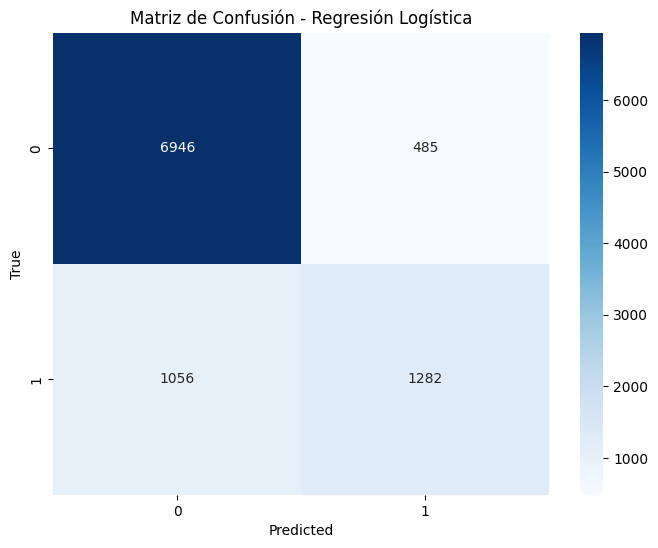

In [279]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [280]:
#cargar el modelo 
pkl_filename="pickle_model_logistico.plk"
with open(pkl_filename, 'wb')as file:
    pickle.dump(logistic_model,file)

In [281]:
print(y.value_counts(normalize=True))

income
0    0.760718
1    0.239282
Name: proportion, dtype: float64


In [282]:
print(X.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [283]:
print(y.unique())

[0 1]
